# CSV stats

In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
bbox = pd.read_csv("D:/Research/Chest_xray/BBox_List_2017.csv") 
bbox

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [2]:
# read csv file
# bbox = pd.read_csv("D:/Research/Chest_xray/BBox_List_2017.csv") (don't need that- for bounding box detection)
df = pd.read_csv("D:/Research/Chest_xray/Data_Entry_2017.csv")

In [3]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [4]:
df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [5]:
# drop unnessary columns: follow-up #, original image, originalimagepixel spacing, col 11
df.drop(['Follow-up #', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'], axis=1, inplace=True)

In [6]:
df

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000001_000.png,Cardiomegaly,1,58,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,1,58,M,PA
3,00000002_000.png,No Finding,2,81,M,PA
4,00000003_000.png,Hernia,3,81,F,PA
...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,30801,39,M,PA
112116,00030802_000.png,No Finding,30802,29,M,PA
112117,00030803_000.png,No Finding,30803,42,F,PA
112118,00030804_000.png,No Finding,30804,30,F,PA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Image Index     112120 non-null  object
 1   Finding Labels  112120 non-null  object
 2   Patient ID      112120 non-null  int64 
 3   Patient Age     112120 non-null  int64 
 4   Patient Gender  112120 non-null  object
 5   View Position   112120 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.1+ MB


In [10]:
df.describe()

,Patient ID,Patient Age
count,112120.000000,112120.000000
mean,14346.381743,46.901463
std,8403.876972,16.839923
min,1.000000,1.000000
25%,7310.750000,35.000000
50%,13993.000000,49.000000
75%,20673.000000,59.000000
max,30805.000000,414.000000


In [64]:
np.unique(df_age["Patient Gender"])

array(['F', 'M'], dtype=object)

In [24]:
# uniuqe patient id 
np.unique(df["Patient ID"])

array([    1,     2,     3, ..., 30803, 30804, 30805], dtype=int64)

In [26]:
# unique position 
np.unique(df["View Position"]) # AP:posterier -> anterior, PA:anterior -> posterier

array(['AP', 'PA'], dtype=object)

In [34]:
# unique finding labels (diseases)
np.unique(df['Finding Labels']) # 14 diseases types

array(['Atelectasis', 'Atelectasis|Cardiomegaly',
       'Atelectasis|Cardiomegaly|Consolidation',
       'Atelectasis|Cardiomegaly|Consolidation|Edema',
       'Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration',
       'Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration|Mass',
       'Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Infiltration|Mass|Nodule',
       'Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Mass',
       'Atelectasis|Cardiomegaly|Consolidation|Edema|Effusion|Pleural_Thickening',
       'Atelectasis|Cardiomegaly|Consolidation|Effusion',
       'Atelectasis|Cardiomegaly|Consolidation|Effusion|Infiltration',
       'Atelectasis|Cardiomegaly|Consolidation|Effusion|Infiltration|Mass',
       'Atelectasis|Cardiomegaly|Consolidation|Effusion|Infiltration|Mass|Pleural_Thickening',
       'Atelectasis|Cardiomegaly|Consolidation|Effusion|Infiltration|Nodule|Pleural_Thickening',
       'Atelectasis|Cardiomegaly|Consolidation|Ef

In [43]:
lower_q=np.quantile(df["Patient Age"],0.25,interpolation='lower')#下四分位数
higher_q=np.quantile(df["Patient Age"],0.75,interpolation='higher')#上四分位数
iqr=higher_q-lower_q #四分位距
lower_q, higher_q, iqr

(35, 59, 24)

In [44]:
lower_range = higher_q - 1.5 * iqr
higher_range = lower_q + 1.5 * iqr
lower_range, higher_range

(23.0, 71.0)

In [70]:
df[df["Patient Age"]>=100]

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
20852,00005567_000.png,Effusion|Pneumonia,5567,412,M,AP
46965,00011973_002.png,Edema,11973,414,M,AP
48284,00012238_010.png,No Finding,12238,148,M,PA
55742,00013950_000.png,No Finding,13950,148,M,PA
58650,00014520_026.png,Infiltration|Mass,14520,150,M,PA
62929,00015558_000.png,No Finding,15558,149,M,PA
74884,00018366_044.png,Pneumothorax,18366,152,F,PA
78795,00019346_000.png,Infiltration,19346,151,F,PA
84810,00020900_002.png,No Finding,20900,411,M,AP
85404,00021047_002.png,Mass|Pleural_Thickening,21047,412,M,AP


In [12]:
df_age = df[(df["Patient Age"]>=23) & (df["Patient Age"] <=71)]
df_age

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000001_000.png,Cardiomegaly,1,58,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,1,58,M,PA
13,00000005_000.png,No Finding,5,69,F,PA
14,00000005_001.png,No Finding,5,69,F,AP
...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,30801,39,M,PA
112116,00030802_000.png,No Finding,30802,29,M,PA
112117,00030803_000.png,No Finding,30803,42,F,PA
112118,00030804_000.png,No Finding,30804,30,F,PA


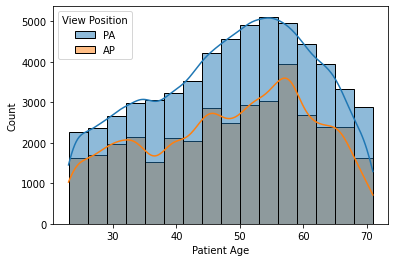

In [61]:
sns.histplot(data=df_age, x="Patient Age", binwidth=3, kde=True, hue="View Position");

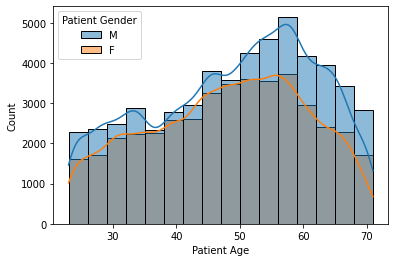

In [62]:
sns.histplot(data=df_age, x="Patient Age", binwidth=3, kde=True, hue="Patient Gender");

In [7]:
# if we ignore the potential impact of the direction (AP and PA), delete that column 
df1 = df.drop(["View Position", "Patient ID"], axis=1)
df1

,Image Index,Finding Labels,Patient Age,Patient Gender
0,00000001_000.png,Cardiomegaly,58,M
1,00000001_001.png,Cardiomegaly|Emphysema,58,M
2,00000001_002.png,Cardiomegaly|Effusion,58,M
3,00000002_000.png,No Finding,81,M
4,00000003_000.png,Hernia,81,F
...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,39,M
112116,00030802_000.png,No Finding,29,M
112117,00030803_000.png,No Finding,42,F
112118,00030804_000.png,No Finding,30,F


In [8]:
# seperate disease labels in the finding labels (problem here: split the pleural thickening)
import re
for i in range(len(df1)):
    labels = df1.iloc[i]["Finding Labels"]
    diseases = re.split(r'[`!@#$%^&*()_+\-=\[\]{};\':"\\|,.<>\/?~]', labels)
    df1.at[i, "Finding Labels"] = diseases

In [9]:
df1

,Image Index,Finding Labels,Patient Age,Patient Gender
0,00000001_000.png,[Cardiomegaly],58,M
1,00000001_001.png,"[Cardiomegaly, Emphysema]",58,M
2,00000001_002.png,"[Cardiomegaly, Effusion]",58,M
3,00000002_000.png,[No Finding],81,M
4,00000003_000.png,[Hernia],81,F
...,...,...,...,...
112115,00030801_001.png,"[Mass, Pneumonia]",39,M
112116,00030802_000.png,[No Finding],29,M
112117,00030803_000.png,[No Finding],42,F
112118,00030804_000.png,[No Finding],30,F


In [10]:
# delete pneumonia based on its further dignosis -> indicated by consolidation
# get the index of cases with penumonia
drop_idxs = []
for i in range(len(df1)):
    for j in df1.iloc[i,1]:
        if "Pneumonia" == j:
            drop_idxs.append(i)

In [15]:
len(drop_idxs)

1431

In [11]:
# drop the pneumonia cases
df1.drop(drop_idxs, axis=0, inplace=True)
df1.index = range(len(df1.index))
df1

,Image Index,Finding Labels,Patient Age,Patient Gender
0,00000001_000.png,[Cardiomegaly],58,M
1,00000001_001.png,"[Cardiomegaly, Emphysema]",58,M
2,00000001_002.png,"[Cardiomegaly, Effusion]",58,M
3,00000002_000.png,[No Finding],81,M
4,00000003_000.png,[Hernia],81,F
...,...,...,...,...
110684,00030801_000.png,[No Finding],39,M
110685,00030802_000.png,[No Finding],29,M
110686,00030803_000.png,[No Finding],42,F
110687,00030804_000.png,[No Finding],30,F


In [17]:
len(np.unique(df1["Finding Labels"]))

694

In [12]:
# add new columns for all types of diesease
## delete pneumonia based on its further dignosis -> indicated by consolidation
disease_lst = ["Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass",
              "Nodule", "Pneumothorax", "Consolidation", "Edema", "Emphysema",
              "Fibrosis", "Pleural", "Thickening", "Hernia", "No Finding"] 

for d in disease_lst:
    df1[d] = 0

In [13]:
df1

,Image Index,Finding Labels,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural,Thickening,Hernia,No Finding
0,00000001_000.png,[Cardiomegaly],58,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,"[Cardiomegaly, Emphysema]",58,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,"[Cardiomegaly, Effusion]",58,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,[No Finding],81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,[Hernia],81,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110684,00030801_000.png,[No Finding],39,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110685,00030802_000.png,[No Finding],29,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110686,00030803_000.png,[No Finding],42,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110687,00030804_000.png,[No Finding],30,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
## relabel the diseases for new adding columns 
for i in range(len(df1)):
    for j in df1.iloc[i,1]:
        df1[j][i] = 1 

C:\Users\Berti\AppData\Local\Temp/ipykernel_24924/4290330641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[j][i] = 1


In [15]:
# drop duplicate column (thickening) and redudant column (finidng labels)
df1.drop(["Finding Labels", "Thickening"], axis=1, inplace=True)
df1

,Image Index,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural,Hernia,No Finding
0,00000001_000.png,58,M,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,58,M,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,00000001_002.png,58,M,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,81,F,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110684,00030801_000.png,39,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
110685,00030802_000.png,29,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
110686,00030803_000.png,42,F,0,0,0,0,0,0,0,0,0,0,0,0,0,1
110687,00030804_000.png,30,F,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
# rename Pleural and save the csv file 
df1.rename(columns={"Pleural": "Pleural_Thickening"}, inplace=True)
df1

,Image Index,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,58,M,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,58,M,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,00000001_002.png,58,M,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,81,F,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110684,00030801_000.png,39,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
110685,00030802_000.png,29,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
110686,00030803_000.png,42,F,0,0,0,0,0,0,0,0,0,0,0,0,0,1
110687,00030804_000.png,30,F,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
# sum of different diseases
subdf = df1.iloc[:, 3:]
subdf.sum(axis=0)

Atelectasis           11297
Cardiomegaly           2735
Effusion              13048
Infiltration          19289
Mass                   5711
Nodule                 6261
Pneumothorax           5261
Consolidation          4544
Edema                  1963
Emphysema              2493
Fibrosis               1675
Pleural_Thickening     3337
Hernia                  224
No Finding            60361
dtype: int64

In [21]:
# multiple diseases in one image
subdf[subdf.sum(axis=1).values>1]

,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,1,0
12,0,0,0,0,1,1,0,0,0,0,0,0,0,0
20,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110663,0,1,1,0,0,0,1,0,0,1,0,0,0,0
110664,0,1,1,0,0,0,1,0,0,1,0,0,0,0
110665,0,1,1,0,0,0,0,0,0,1,0,0,0,0
110667,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [22]:
# single factor (disease) cases ## less than 20 categorical, so it's fine to use one-hot encoding
single_idx = list(subdf[subdf.sum(axis=1).values>1].index)
df1.drop(single_idx, axis=0, inplace=True)
df1.index = range(len(df1.index))

In [23]:
df1

,Image Index,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,58,M,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000002_000.png,81,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,00000003_000.png,81,F,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,00000003_001.png,74,F,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,00000003_002.png,75,F,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90997,00030801_000.png,39,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
90998,00030802_000.png,29,M,0,0,0,0,0,0,0,0,0,0,0,0,0,1
90999,00030803_000.png,42,F,0,0,0,0,0,0,0,0,0,0,0,0,0,1
91000,00030804_000.png,30,F,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
for i in range(len(df1)):
    if df1["Patient Gender"][i] == "M":
        df1.at[i, "Patient Gender"] = 1
    else:
        df1.at[i, "Patient Gender"] = 0